In [97]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=119937 sha256=558efa29f25cf3246f11f460933367f5981dc36fe4c10623419f06da81368dca
  Stored in directory: /tmp/pip-ephem-wheel-cache-k9c7ux0g/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [1]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "latapy_test_intro_nodes.sg",
                      path_links=path_directory + "latapy_test_intro_links.sg")
S.describe()

Nb of Nodes :  5
Nb of segmented nodes :  5.0
Nb of links :  6
Nb of segmented links :  16.0
Nb of event times :  26


In [2]:
S.links

[(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4)]

In [3]:
S.link_presence[2]

[3.0, 5.0, 11.0, 11.0, 19.0, 22.0, 25.0, 28.0]

<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


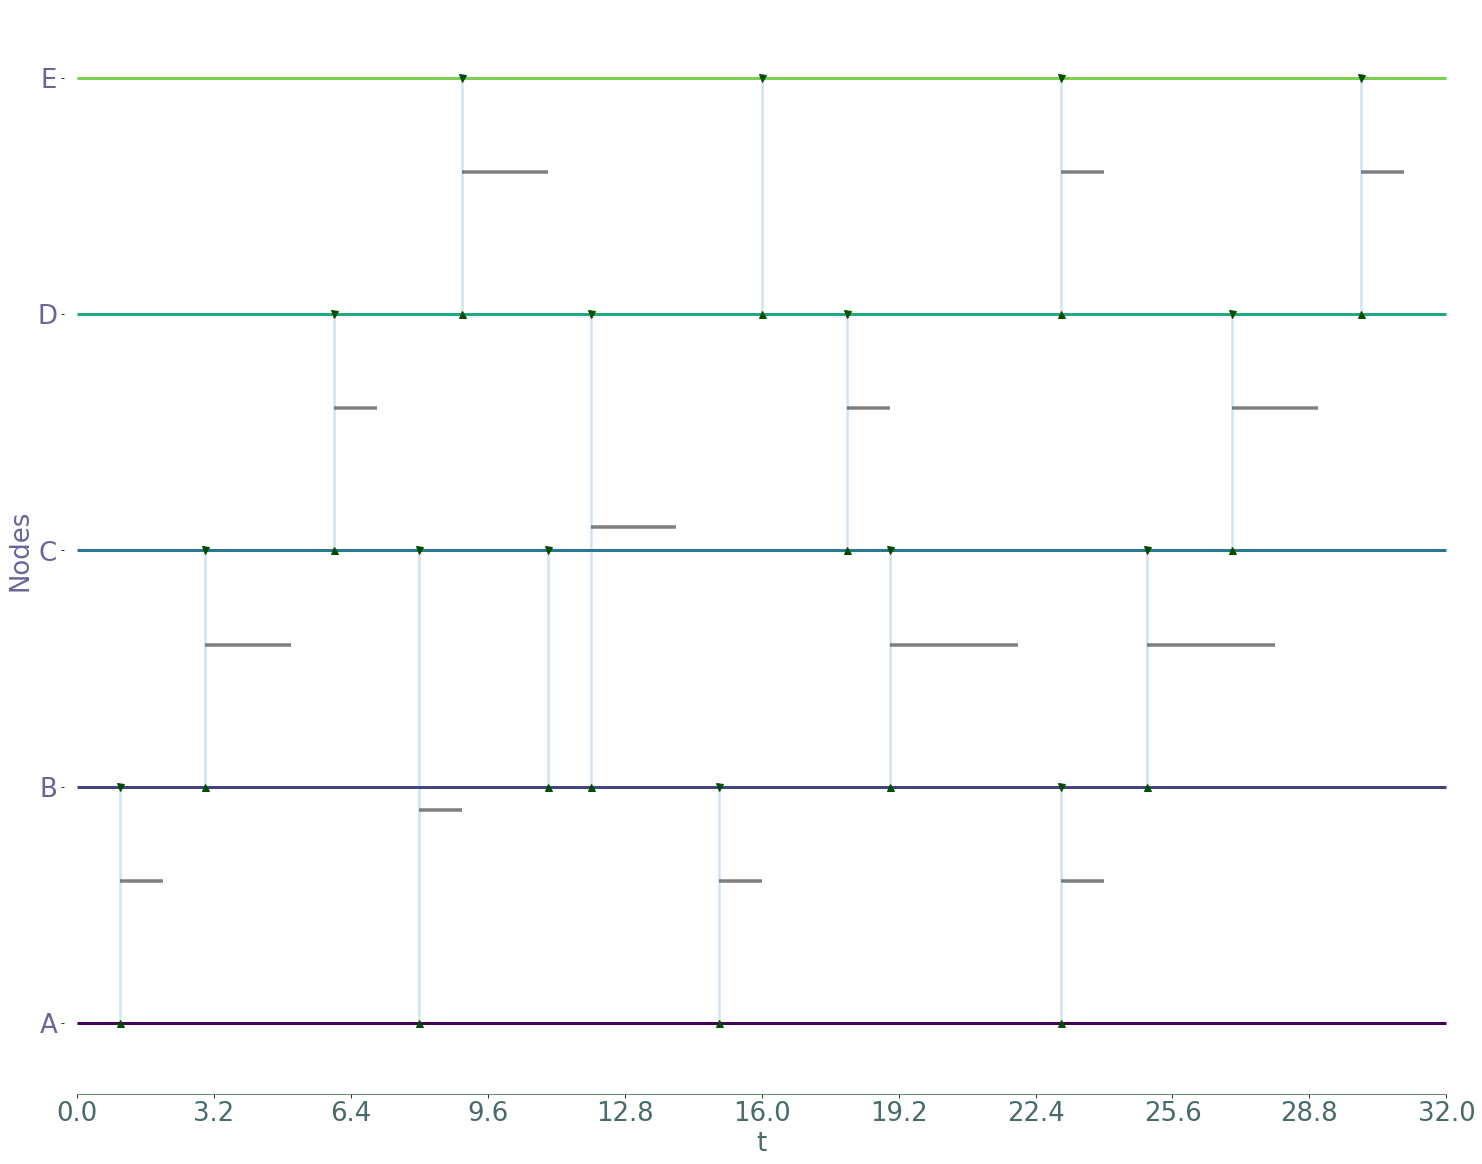

In [4]:
S.plot()

In [5]:
for i in range(0,2*int(max(list(S.event_times())))):
    S.add_point(i/2)
nouveau = S.fragmented_stream_graph()

In [6]:
len(nouveau.event_times())

65

<AxesSubplot:xlabel='t', ylabel='Nodes'>

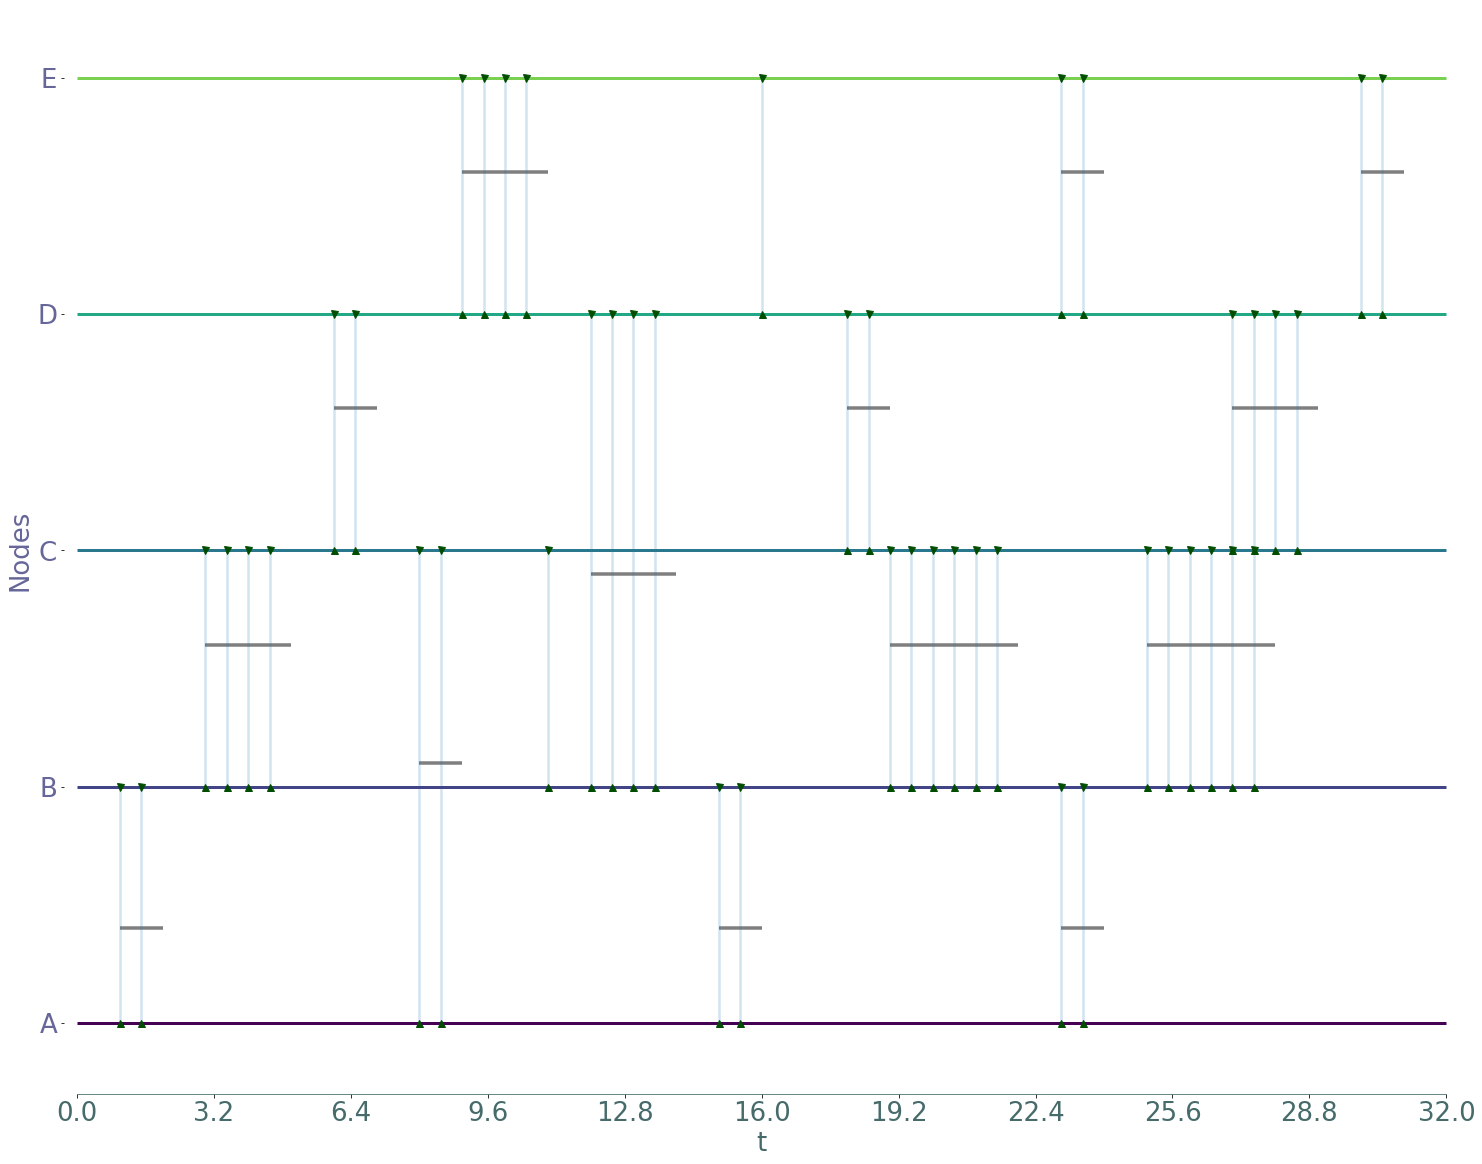

In [7]:
nouveau.plot()

In [10]:
pre = dict()
cur_best = dict()
for e in nouveau.nodes:
    pre[e], cur_best[e] = nouveau.count_walks_paper(e)
print("resultat : ")

resultat : 


In [29]:
#pre[1][0]

In [30]:
lat = dict()
for e in nouveau.nodes:
    lat[e] = nouveau.latencies(cur_best[e])

In [31]:
lat[0][4]

{9.0: (2.0, 4), 16.0: (9.0, 4), 23.0: (16.0, 4), 30.0: (24.0, 4)}

In [32]:
G = dict()
for e in nouveau.nodes:
    G[e] = nouveau.predecessor_graph(pre[e],e)

In [38]:
import networkx as nx
Gp = dict()
for e in nouveau.nodes:
    des = nx.descendants(G[e], (e,0))
    des.add((e,0))
    Gp[e] = nx.subgraph(G[e],des)

In [39]:
#fig, ax = plt.subplots(figsize=(30,30))
#nx.draw_networkx(G[1],arrows=True,width = 1,ax = ax)

In [40]:
#import networkx as nx
#fig, ax = plt.subplots(figsize=(30,30))
#nx.draw_networkx(Gp,arrows=True,width = 1,ax = ax)

In [43]:
#for e in Gp[1][(2,27.5)]:
#    print(e)

In [45]:
#verifier que c'est dans l'ordre
#Gp.nodes()

In [46]:
#(list(nx.simple_cycles(Gp)))

In [47]:
#temp_node = (1,11)
#for e in nx.all_simple_paths(Gp,(0,0.0),temp_node):
#    print(e)

In [48]:
#paths = nx.all_simple_paths(Gp,(0,0.0),temp_node)
#for path in map(nx.utils.pairwise, paths):
#    #print(list(path))
#    for e in path:
#        print(G[e[0]][e[1]]['interval'],end="")
#    print("")
    

In [49]:
#temp_node = (2,3)
#for e in nx.all_simple_paths(Gp,(0,0.0),temp_node):
#    print(e)

In [50]:
#paths = nx.all_simple_paths(Gp,(0,0.0),temp_node)
#for path in map(nx.utils.pairwise, paths):
#    #print(list(path))
#    for e in path:
#        print(G[e[0]][e[1]]['interval'],end="")
#    print("")
    

In [52]:
sigma = dict()
for e in nouveau.nodes:
    sigma[e] = nouveau.volume_metapaths(e, Gp[e])

node (1, 1.0)
last (1.0, 1.0) before_last (-1, -1) b True instantenous True
poly  (1, 1.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (1, 2.0)
last (1.5, 2.0) before_last (-1, -1) b True instantenous True
poly  (1, 2.0) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (2, 3.0)
last (3.0, 3.0) before_last (1.5, 2.0) b True instantenous True
poly  (2, 3.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (3, 6.0)
last (6.0, 6.0) before_last (3.0, 3.0) b True instantenous False
poly  (3, 6.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (4, 9.0)
last (9.0, 9.0) before_last (6.0, 6.0) b True instantenous False
poly  (4, 9.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (4, 11.0)
last (10.5, 11.0) before_last (6.0, 6.0) b False instantenous False
poly  (4, 11.0) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (4, 9.5)
last (9.0, 9.5) before_last (6.0, 6.0) b False instantenous False
poly  (4, 9.5) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (4, 10.0)
last (9.5, 10.0) before_last (6.0, 6.0) b False 

node (4, 31.0)
last (30.5, 31.0) before_last (28.5, 29.0) b False instantenous False
poly  (4, 31.0) 0.0 + 0.0·x¹ + 0.0·x² + 0.125·x³ + 0.0·x⁴
node (4, 30.5)
last (30.0, 30.5) before_last (28.5, 29.0) b False instantenous False
poly  (4, 30.5) 0.0 + 0.0·x¹ + 0.0·x² + 0.125·x³ + 0.0·x⁴
node (2, 26.5)
last (26.0, 26.5) before_last (23.5, 24.0) b False instantenous True
poly  (2, 26.5) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (3, 27.0)
last (27.0, 27.0) before_last (26.0, 26.5) b False instantenous False
poly  (3, 27.0) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (4, 30.0)
last (30.0, 30.0) before_last (27.0, 27.0) b False instantenous False
poly  (4, 30.0) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (4, 31.0)
last (30.5, 31.0) before_last (27.0, 27.0) b False instantenous False
poly  (4, 31.0) 0.0 + 0.0·x¹ + 0.25·x² + 0.0·x³ + 0.0·x⁴
node (4, 30.5)
last (30.0, 30.5) before_last (27.0, 27.0) b False instantenous False
poly  (4, 30.5) 0.0 + 0.0·x¹ + 0.25·x² + 0.0·x³ + 0.0·x⁴
node (3,

poly  (4, 16.0) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (3, 13.0)
last (12.5, 13.0) before_last (11.0, 11.0) b False instantenous False
poly  (3, 13.0) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (4, 16.0)
last (16.0, 16.0) before_last (12.5, 13.0) b False instantenous False
poly  (4, 16.0) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (3, 13.5)
last (13.0, 13.5) before_last (11.0, 11.0) b False instantenous False
poly  (3, 13.5) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (4, 16.0)
last (16.0, 16.0) before_last (13.0, 13.5) b False instantenous False
poly  (4, 16.0) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (3, 14.0)
last (13.5, 14.0) before_last (11.0, 11.0) b False instantenous False
poly  (3, 14.0) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (4, 16.0)
last (16.0, 16.0) before_last (13.5, 14.0) b False instantenous False
poly  (4, 16.0) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (1, 19.0)
last (19.0, 19.0) before_last (-1, -1) b True instantenous True
poly  (1, 19.0) 1.0

node (2, 18.5)
last (18.0, 18.5) before_last (16.0, 16.0) b False instantenous False
poly  (2, 18.5) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (1, 19.0)
last (19.0, 19.0) before_last (18.0, 18.5) b False instantenous False
poly  (1, 19.0) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (0, 23.5)
last (23.0, 23.5) before_last (19.0, 19.0) b False instantenous False
poly  (0, 23.5) 0.0 + 0.0·x¹ + 0.25·x² + 0.0·x³ + 0.0·x⁴
node (0, 23.0)
last (23.0, 23.0) before_last (19.0, 19.0) b False instantenous False
poly  (0, 23.0) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (0, 24.0)
last (23.5, 24.0) before_last (19.0, 19.0) b False instantenous False
poly  (0, 24.0) 0.0 + 0.0·x¹ + 0.25·x² + 0.0·x³ + 0.0·x⁴
node (1, 19.5)
last (19.0, 19.5) before_last (18.0, 18.5) b False instantenous False
poly  (1, 19.5) 0.0 + 0.0·x¹ + 0.25·x² + 0.0·x³ + 0.0·x⁴
node (0, 23.5)
last (23.0, 23.5) before_last (19.0, 19.5) b False instantenous False
poly  (0, 23.5) 0.0 + 0.0·x¹ + 0.0·x² + 0.125·x³ + 0.0·x⁴
node (0,

In [53]:
#for e in sigma[node].keys():
#    print(e,sigma[e][0],sigma[e][1],sigma[e][2])

In [54]:
#sigma[temp_node]

In [55]:
#sigma[(3,27.5)][0]

In [56]:
#sigma[(3,28)][0]

In [57]:
#sigma[(4,16)][0]

In [58]:
sigma_r = dict()
for e in nouveau.nodes:
    sigma_r[e] = nouveau.volume_metapaths_with_restingpaths(e, Gp[e], sigma[e])

noder (1, 1.0) predr (-1, -1) last inter (1.0, 1.0) before last inter (-1, -1) pred_depar -1 actual_depar 1.0
succ
noder (1, 1.5) predr (1, 1.0) last inter (1.0, 1.5) before last inter (-1, -1) pred_depar 1.0 actual_depar 1.5
succ
noder (1, 2.0) predr (1, 1.5) last inter (1.5, 2.0) before last inter (-1, -1) pred_depar 1.5 actual_depar 2.0
succ
noder (2, 3.0) predr (-1, -1) last inter (3.0, 3.0) before last inter (1.5, 2.0) pred_depar -1 actual_depar 2.0
succ
noder (3, 6.0) predr (-1, -1) last inter (6.0, 6.0) before last inter (3.0, 3.0) pred_depar -1 actual_depar 2.0
succ
noder (4, 9.0) predr (-1, -1) last inter (9.0, 9.0) before last inter (6.0, 6.0) pred_depar -1 actual_depar 2.0
succ
noder (4, 9.5) predr (4, 9.0) last inter (9.0, 9.5) before last inter (6.0, 6.0) pred_depar 2.0 actual_depar 2.0
succ
noder (4, 10.0) predr (4, 9.5) last inter (9.5, 10.0) before last inter (6.0, 6.0) pred_depar 2.0 actual_depar 2.0
succ
noder (4, 10.5) predr (4, 10.0) last inter (10.0, 10.5) before l

noder (4, 30.5) predr (4, 30.0) last inter (30.0, 30.5) before last inter (28.0, 28.5) pred_depar 24.0 actual_depar 24.0
succ
noder (4, 31.0) predr (4, 30.5) last inter (30.5, 31.0) before last inter (28.0, 28.5) pred_depar 24.0 actual_depar 24.0
succ
noder (3, 29.0) predr (3, 28.5) last inter (28.5, 29.0) before last inter (27.0, 27.5) pred_depar 24.0 actual_depar 24.0
succ
noder (4, 30.0) predr (-1, -1) last inter (30.0, 30.0) before last inter (28.5, 29.0) pred_depar -1 actual_depar 24.0
succ
noder (4, 30.5) predr (4, 30.0) last inter (30.0, 30.5) before last inter (28.5, 29.0) pred_depar 24.0 actual_depar 24.0
succ
noder (4, 31.0) predr (4, 30.5) last inter (30.5, 31.0) before last inter (28.5, 29.0) pred_depar 24.0 actual_depar 24.0
succ
noder (2, 28.0) predr (2, 27.5) last inter (27.5, 28.0) before last inter (23.5, 24.0) pred_depar 24.0 actual_depar 24.0
succ
noder (3, 28.0) predr (-1, -1) last inter (27.5, 28.0) before last inter (27.5, 28.0) pred_depar -1 actual_depar 24.0
suc

succ
noder (0, 23.0) predr (-1, -1) last inter (23.0, 23.0) before last inter (21.0, 21.5) pred_depar -1 actual_depar 19.0
succ
noder (0, 23.5) predr (0, 23.0) last inter (23.0, 23.5) before last inter (21.0, 21.5) pred_depar 19.0 actual_depar 19.0
succ
noder (0, 24.0) predr (0, 23.5) last inter (23.5, 24.0) before last inter (21.0, 21.5) pred_depar 19.0 actual_depar 19.0
succ
noder (1, 22.0) predr (1, 21.5) last inter (21.5, 22.0) before last inter (18.5, 19.0) pred_depar 19.0 actual_depar 19.0
succ
noder (0, 23.0) predr (-1, -1) last inter (23.0, 23.0) before last inter (21.5, 22.0) pred_depar -1 actual_depar 19.0
succ
noder (0, 23.5) predr (0, 23.0) last inter (23.0, 23.5) before last inter (21.5, 22.0) pred_depar 19.0 actual_depar 19.0
succ
noder (0, 24.0) predr (0, 23.5) last inter (23.5, 24.0) before last inter (21.5, 22.0) pred_depar 19.0 actual_depar 19.0
succ
noder (1, 25.0) predr (1, 22.0) last inter (25.0, 25.0) before last inter (18.5, 19.0) pred_depar 19.0 actual_depar 19.

In [60]:
#for e in sigma_r.keys():
#    print(e,sigma_r[e][1])

In [61]:
#sigma_r[(2, 4.0)][1]

In [62]:
#sigma_r[(3, 7)][1]

In [63]:
#pre, cur_best = llll
events = list(nouveau.event_times())
events.sort()
close_arrival = dict()
for e in nouveau.nodes:
    close_arrival[e] = nouveau.closest_arrival_contri(cur_best[e], events)

In [64]:
events_reverse = dict()
for i in range(0,len(events)):
    events_reverse[events[i]] = i 

In [66]:
#print(events_reverse)

In [67]:
contri = dict()
prev_next = dict()
for e in nouveau.nodes:
    contri[e], prev_next[e] = nouveau.contribution_each_latency(lat[e], sigma_r[e], events_reverse)

lat[i] (1.0, 1) latj[j] (1.5, 1) node 1
ok = > lat[i] (1.0, 1) latj[j] (1.5, 1) node 1
lat[i] (1.5, 1) latj[j] (1.0, 1) node 1
ok = > lat[i] (1.5, 1) latj[j] (1.0, 1) node 1
lat[i] (1.5, 1) latj[j] (2.0, 1) node 1
ok = > lat[i] (1.5, 1) latj[j] (2.0, 1) node 1
lat[i] (2.0, 1) latj[j] (1.5, 1) node 1
ok = > lat[i] (2.0, 1) latj[j] (1.5, 1) node 1
lat[i] (15.0, 1) latj[j] (15.5, 1) node 1
ok = > lat[i] (15.0, 1) latj[j] (15.5, 1) node 1
lat[i] (15.5, 1) latj[j] (15.0, 1) node 1
ok = > lat[i] (15.5, 1) latj[j] (15.0, 1) node 1
lat[i] (15.5, 1) latj[j] (16.0, 1) node 1
ok = > lat[i] (15.5, 1) latj[j] (16.0, 1) node 1
lat[i] (16.0, 1) latj[j] (15.5, 1) node 1
ok = > lat[i] (16.0, 1) latj[j] (15.5, 1) node 1
lat[i] (23.0, 1) latj[j] (23.5, 1) node 1
ok = > lat[i] (23.0, 1) latj[j] (23.5, 1) node 1
lat[i] (23.5, 1) latj[j] (23.0, 1) node 1
ok = > lat[i] (23.5, 1) latj[j] (23.0, 1) node 1
lat[i] (23.5, 1) latj[j] (24.0, 1) node 1
ok = > lat[i] (23.5, 1) latj[j] (24.0, 1) node 1
lat[i] (24.0, 1

In [68]:
#nodec = 4
#lat[nodec]

In [69]:
#contri[nodec]

In [70]:
#prev_next[nodec]

In [72]:
pointer = dict()
for e in nouveau.nodes:
    pointer[e] = nouveau.pointers(sigma_r[e])
#print(pointer)
#print(pointer[(1,27.5)])

In [74]:
pointer2 = dict()
for e in nouveau.nodes:
    pointer2[e] = nouveau.pointers2(contri[e])
#print(pointer2)
#print(pointer2[(1,4)])

In [75]:
#pointer3 = dict()
#for e in nouveau.nodes:
#    pointer3[e] = nouveau.pointers3(llll[1])
#print(pointer3)
#print(pointer3[(1,5)])

In [76]:
#vol_bet = nouveau.volume_between_direct_arrivals(node, G, pre)

In [77]:
#vv,tt = 2,27
#for e in vol_bet[vv][tt]:
#    print(e,vol_bet[vv][tt][e])

In [79]:
lat_rev = dict()
for e in nouveau.nodes:
    lat_rev[e] = nouveau.latencies_rev(lat[e], events)

In [80]:
#sigma_r[pointer[(1, 27.5)]][1]

In [81]:
#nouveau.delta_svvt( node, 3, 28.0, lat, contri, prev_next, sigma_r, pointer, pointer2,{},lat_rev)

In [82]:
#(v,t) = (1,27.5)
#print(node)
#nouveau.delta_svt(node, v, t, Gp, lat, contri, prev_next, sigma_r, pointer, pointer2, lat_rev)

In [71]:
contribution, partial = nouveau.contri_delta_svt(node, 1, 24, Gp, lat, contri, prev_next, sigma_r, {}, {}, {}, pointer, lat_rev, events, events_reverse, pre, vol_bet)

******** new call contri_delta_svt v 1 t 24
///////// call svvt,  s 0 v 1 t 24
t_contri 1 24
t_sigma 1 24.0
prev [24.0]
next [32.0]
vol_tv 1.0 [1.]
s_prime 24.0 s_left 24.0 a_right 32.0 a_prime 24
enum poly 0.0
actual enum -1
left 0 vol_tv 1.0 right 0
denum poly 1.0
actual denum 0
enum (0,) denum (1.0,)
contrib 0.0
end svvt 0.0
dic_nodes {25.0: [2], 25.5: [2], 26.0: [2], 26.5: [2], 27.0: [2], 27.5: [2], 28.0: [2]}
(w,t') (2, 28.0)
divison_volume v 1 t 24 w 2 t_p 28.0
st1t2 0.0 + 0.5·x¹
svt 1.0
svt*st1t2 0.0 + 0.5·x¹
actual svt 1
svt_hight (0, 0.5)
swtp 1.0 + 3.0·x¹
actual swtp 1
swtp_high (0, 3.0)
res_div [0.16666667]
******** new call contri_delta_svt v 2 t 28.0
///////// call svvt,  s 0 v 2 t 28.0
dic_nodes {28.0: [3], 28.5: [3], 29.0: [3]}
(w,t') (3, 29.0)
divison_volume v 2 t 28.0 w 3 t_p 29.0
st1t2 0.0 + 0.5·x¹
svt 1.0 + 3.0·x¹
svt*st1t2 0.0 + 0.5·x¹ + 1.5·x²
actual svt 2
svt_hight (0, 0, 1.5)
swtp 1.0 + 4.0·x¹ + 5.5·x²
actual swtp 2
swtp_high (0, 0, 5.5)
res_div [0.27272727]
****

res_div [1.]
******** new call contri_delta_svt v 3 t 27.0
///////// call svvt,  s 0 v 3 t 27.0
t_contri 3 27.0
t_sigma 3 27.0
prev [16.0, 9.0, 0]
next [32.0]
vol_tv 1.0 + 2.0·x¹ [1. 2.]
s_prime 24.0 s_left 16.0 a_right 32.0 a_prime 27.0
enum poly 40.0 + 80.0·x¹
actual enum 1
left 0 vol_tv 1.0 + 2.0·x¹ right 0
denum poly 1.0 + 2.0·x¹
actual denum 1
enum (0, 80.0) denum (0, 2.0)
contrib 40.0
s_prime 16.0 s_left 9.0 a_right 32.0 a_prime 27.0
enum poly 35.0 + 70.0·x¹
actual enum 1
left 1.0 vol_tv 1.0 + 2.0·x¹ right 0
denum poly 2.0 + 2.0·x¹
actual denum 1
enum (0, 70.0) denum (0, 2.0)
contrib 75.0
s_prime 9.0 s_left 0 a_right 32.0 a_prime 27.0
enum poly 45.0 + 90.0·x¹
actual enum 1
left 2.0 vol_tv 1.0 + 2.0·x¹ right 0
denum poly 3.0 + 2.0·x¹
actual denum 1
enum (0, 90.0) denum (0, 2.0)
contrib 120.0
end svvt 120.0
dic_nodes {30.0: [4], 31.0: [4], 30.5: [4]}
(w,t') (4, 31.0)
divison_volume v 3 t 27.0 w 4 t_p 31.0
st1t2 0.0 + 0.5·x¹
svt 1.0 + 2.0·x¹
svt*st1t2 0.0 + 0.5·x¹ + 1.0·x²
actual sv

In [72]:
#contribution_finale = nouveau.contri_link_stream(contribution, partial, events, events_reverse, close_arrival, sigma_r, pointer)

In [73]:
for k in contribution:
    for e in contribution[k].keys():
        print(k,e,"=>" ,contribution[k][e])

4 31.0 => 0.0
4 30.5 => 0.0
4 30.0 => 48.0
3 31.0 => 0.0
3 30.5 => 0.0
3 29.5 => 48.0
3 30.0 => 48.0
3 29.0 => 48.0
3 28.5 => 34.90909090909091
3 28.0 => 21.818181818181817
3 27.5 => 9.818181818181818
3 27.0 => 120.0
2 29.0 => 0.0
2 28.5 => 13.09090909090909
2 28.0 => 26.18181818181818
2 27.5 => 32.72727272727273
2 27.0 => 154.9090909090909
2 26.5 => 116.18181818181819
2 26.0 => 77.45454545454545
2 25.5 => 38.72727272727273
2 25.0 => 105.0
1 28.0 => 0.0
1 27.5 => 4.363636363636364
1 27.0 => 10.909090909090914
1 26.5 => 49.63636363636365
1 26.0 => 88.36363636363637
1 25.5 => 127.0909090909091
1 24.5 => 270.8181818181818
1 25.0 => 270.8181818181818
1 24 => 270.8181818181818


In [83]:
contribution[1][27.5]

Polynomial([187.63636364], domain=[-1.,  1.], window=[-1.,  1.])

In [86]:
nd = 2
l = list(contribution[nd].keys())
l.sort()
for e in l:
    print(nd, e,contribution[nd][e])

2 25.0 105.0
2 25.5 38.72727272727273
2 26.0 77.45454545454545
2 26.5 116.18181818181819
2 27.0 154.9090909090909
2 27.5 32.72727272727273
2 28.0 26.18181818181818
2 28.5 13.09090909090909
2 29.0 0.0


In [85]:
import numpy.polynomial.polynomial as nppol
p = nppol.Polynomial([0,1])
tuple(p.coef)

(0.0, 1.0)

In [87]:
26.18/4.8

5.454166666666667

In [81]:
26.18*(0.5/3)

4.363333333333333

In [85]:
26.18*(0.625/3)

5.454166666666667

In [106]:
0.5/3

0.16666666666666666

In [82]:
26.18*0.208

5.44544

In [83]:
2/9.6

0.20833333333333334

In [113]:
26.18*0.25

6.545

In [84]:
2*3/9.6

0.625